In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set plot style
plt.style.use('ggplot')

In [6]:
# Load the dataset from the provided CSV file
# Make sure 'Iris.csv' is in the same directory as your notebook
df = pd.read_csv(r"C:\Users\bond9\Downloads\archive (2)\Iris.csv")

# Drop the 'Id' column as it's not a feature
df = df.drop('Id', axis=1)

# Display the first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Separate features (X) and target (y)
X = df.iloc[:, :-1] # All columns except the last one
y = df.iloc[:, -1]  # The last column 'Species'

# Encode the categorical target variable 'Species' into numerical labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("\nShape of features (X):", X.shape)
print("Shape of target (y):", y_encoded.shape)
print("Class labels:", dict(zip(le.classes_, le.transform(le.classes_))))


First 5 rows of the dataset:


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa



Shape of features (X): (150, 4)
Shape of target (y): (150,)
Class labels: {'Iris-setosa': np.int64(0), 'Iris-versicolor': np.int64(1), 'Iris-virginica': np.int64(2)}


In [7]:
# Split the dataset into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data successfully scaled and split.")

Data successfully scaled and split.


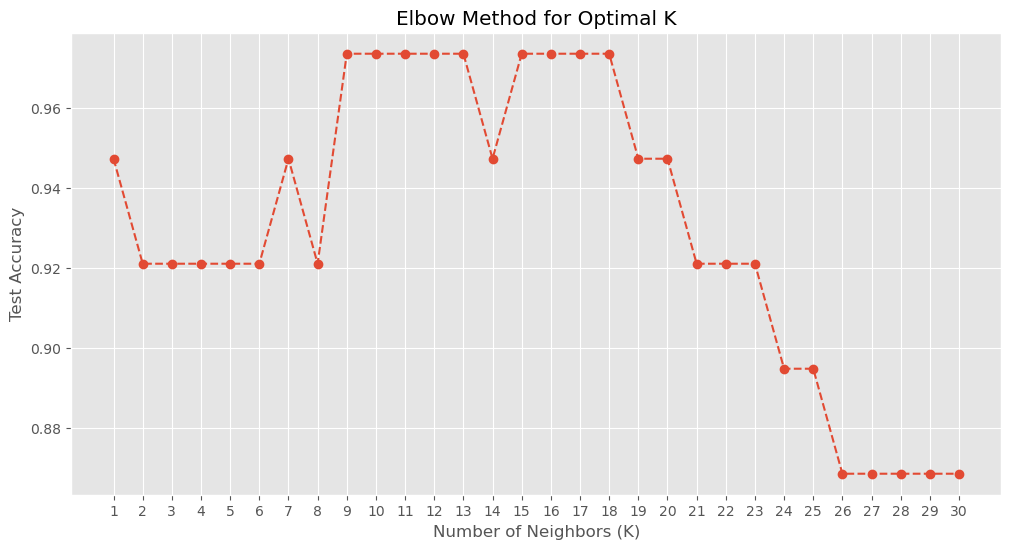

The optimal value for K is 9 with an accuracy of 0.9737


In [8]:
k_range = range(1, 31)
test_accuracies = []

for k in k_range:
    # Initialize the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    knn.fit(X_train_scaled, y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test_scaled)
    
    # Calculate and store the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    test_accuracies.append(accuracy)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(k_range, test_accuracies, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Test Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Find the optimal K
optimal_k = k_range[np.argmax(test_accuracies)]
print(f"The optimal value for K is {optimal_k} with an accuracy of {max(test_accuracies):.4f}")

Final Model Accuracy: 0.9737

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



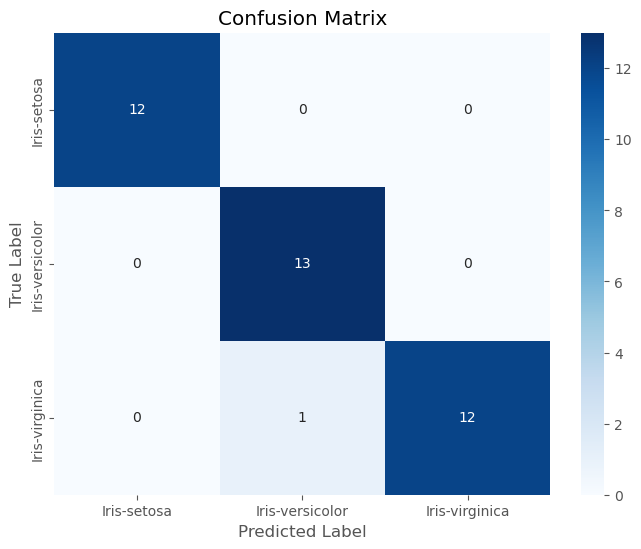

In [9]:
# Train the final model with the optimal K
knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(X_train_scaled, y_train)

# Make predictions
y_pred_final = knn_final.predict(X_test_scaled)

# --- Evaluation ---

# 1. Accuracy Score
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Final Model Accuracy: {final_accuracy:.4f}\n")

# 2. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_final, target_names=le.classes_))

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

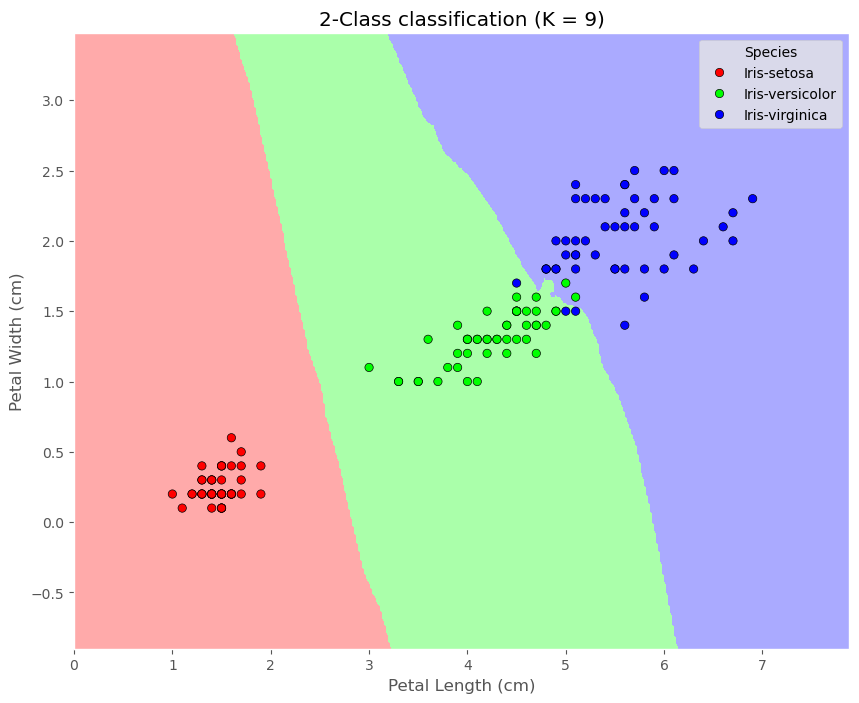

In [11]:
# Use only two features for visualization: Petal Length and Petal Width
X_vis = df[['PetalLengthCm', 'PetalWidthCm']].values
y_vis = y_encoded

# Train a new KNN model on the 2D data
knn_vis = KNeighborsClassifier(n_neighbors=optimal_k)
knn_vis.fit(X_vis, y_vis)

# Create a mesh grid for plotting
h = .02  # step size in the mesh
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the class for each point in the mesh grid
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# --- Plotting --- 
plt.figure(figsize=(10, 8))

# Create a colormap for the background regions
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

# Create a list of colors for the scatter plot points
palette_bold = ['#FF0000', '#00FF00', '#0000FF']

# Plot the decision boundaries
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot the training points
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=df['Species'],
                palette=palette_bold, alpha=1.0, edgecolor="black")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f'2-Class classification (K = {optimal_k})')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.show()